In [1]:

import pandas as pd
from sklearn.utils import shuffle
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


In [23]:
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], [iris['target_names'][int(x)] for x in iris['target']]], 
                 columns=iris['feature_names'] + ['target'])
# Data is already shuffled in this case
df = shuffle(df)

df.head(5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
39,5.1,3.4,1.5,0.2,setosa
137,6.4,3.1,5.5,1.8,virginica
107,7.3,2.9,6.3,1.8,virginica
102,7.1,3.0,5.9,2.1,virginica
9,4.9,3.1,1.5,0.1,setosa


In [24]:
X = df.iloc[:, 0:4].values.astype(np.float32)
y = df.iloc[:, 4].values

print(X[0:5])
print(y[0:5])

[[5.1 3.4 1.5 0.2]
 [6.4 3.1 5.5 1.8]
 [7.3 2.9 6.3 1.8]
 [7.1 3.  5.9 2.1]
 [4.9 3.1 1.5 0.1]]
['setosa' 'virginica' 'virginica' 'virginica' 'setosa']


In [34]:
# Print feature names from iris dataset
print("Iris feature names:")
print(iris['feature_names'])

Iris feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [36]:
## 1. Train the Perceptron
feature_1 = 0
feature_2 = 1
feature_1_name = iris['feature_names'][feature_1]
feature_2_name = iris['feature_names'][feature_2]

# Convert string labels to numeric (-1 for setosa, 1 for versicolor)
# We'll only use two classes for binary classification
setosa_versicolor_mask = (y == 'setosa') | (y == 'versicolor')
X_binary = X[setosa_versicolor_mask][:, [feature_1, feature_2]]
y_binary = np.where(y[setosa_versicolor_mask] == 'setosa', -1, 1)

# Create and train the perceptron
from Perceptron import Perceptron
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X_binary, y_binary)

print('Number of misclassifications in each epoch:', ppn.errors_)



Number of misclassifications in each epoch: [44, 32, 21, 10, 7, 12, 7, 8, 6, 9]


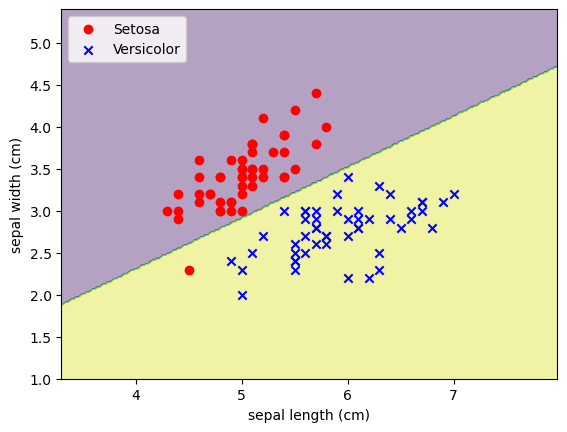

In [37]:
## 2. Plot the decision boundary
# Plot setup
x_min, x_max = X_binary[:, 0].min() - 1, X_binary[:, 0].max() + 1
y_min, y_max = X_binary[:, 1].min() - 1, X_binary[:, 1].max() + 1

# Create a mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                np.arange(y_min, y_max, 0.02))
# Get predictions for each point in the mesh
Z = ppn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and scatter plot
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_binary[y_binary == -1, feature_1], X_binary[y_binary == -1, feature_2], 
           c='red', marker='o', label='Setosa')
plt.scatter(X_binary[y_binary == 1, feature_1], X_binary[y_binary == 1, feature_2],
           c='blue', marker='x', label='Versicolor')

plt.xlabel(feature_1_name)
plt.ylabel(feature_2_name)
plt.legend(loc='upper left')
plt.show()

